In [107]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale, minmax_scale, robust_scale
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
%matplotlib inline
# %matplotlib tk
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [15]:
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# 데이터 구성하기 - 콘크리트
데이터를 ( train(0.4) : validation(0.3) : test(0.3) )의 비율로 분할했습니다

In [3]:
df_raw = pd.read_csv("Concrete.csv", engine = "python")
df_raw_y = df_raw["CONCRETE_COMPRESSIVE_STRENGTH"]
df_raw_x = df_raw.drop("CONCRETE_COMPRESSIVE_STRENGTH", axis = 1, inplace = False)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.3, random_state = 1234)
df_train_x, df_validation_x, df_train_y, df_validation_y = train_test_split(df_train_x, df_train_y, test_size = 0.428, random_state = 1234)

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))

print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

print("validation data X size : {}".format(df_validation_x.shape))
print("validation data Y size : {}".format(df_validation_y.shape))


train data X size : (412, 8)
train data Y size : (412,)
test data X size : (309, 8)
test data Y size : (309,)
validation data X size : (309, 8)
validation data Y size : (309,)


# 의사결정 나무 모델

In [4]:
tree_uncustomized = DecisionTreeRegressor(random_state=1234)
tree_uncustomized.fit(df_train_x,df_train_y)
print("Score on training set:{:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set:{:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Score on training set:1.000
Score on test set:0.699


In [5]:
tree_uncustomized

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1234, splitter='best')

# parameter - 리프의 최소 자료 수 조정
표와 그래프를 보고 리프의 최소 자료 수는 4로 조정했습니다

In [6]:
train_score = []
validation_score = []
para_leaf = [n_leaf * 1 for n_leaf in range(1,20)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=v_min_samples_leaf)
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    validation_score.append(tree.score(df_validation_x,df_validation_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamlesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["Validation_Score"] = validation_score


df_score_leaf.round(3)

,MinSamlesLeaf,TrainScore,Validation_Score
0,1,1.000,0.689
1,2,0.984,0.688
2,3,0.962,0.688
3,4,0.948,0.718
4,5,0.918,0.681
5,6,0.908,0.678
6,7,0.889,0.679
7,8,0.876,0.671
8,9,0.862,0.659
9,10,0.857,0.663


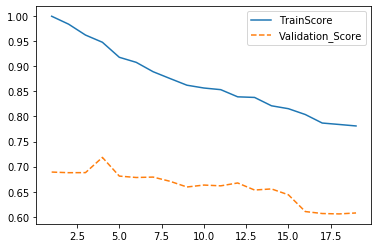

In [7]:
plt.plot(para_leaf, train_score, linestyle = "-", label="TrainScore")
plt.plot(para_leaf, validation_score, linestyle = "--", label="Validation_Score")
plt.legend()

# parameter - 분리노드의 최소 자료수 조정
분리노드의 최소 자료수는 8로 조정했습니다

In [8]:
train_score = []
validation_score = []
para_split = [n_split * 1 for n_split in range(4,20)]

for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=4, min_samples_split=v_min_samples_split)
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    validation_score.append(tree.score(df_validation_x,df_validation_y))
    
df_score_split = pd.DataFrame()
df_score_split["MinSamlesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["Validation_Score"] = validation_score
df_score_split.round(3)



,MinSamlesSplit,TrainScore,Validation_Score
0,4,0.948,0.718
1,5,0.948,0.718
2,6,0.948,0.718
3,7,0.948,0.718
4,8,0.948,0.718
5,9,0.941,0.716
6,10,0.939,0.712
7,11,0.931,0.711
8,12,0.926,0.700
9,13,0.922,0.697


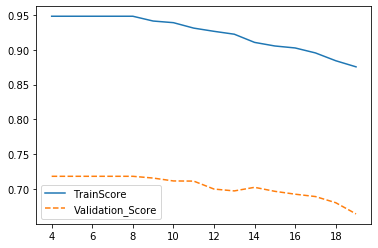

In [9]:
plt.plot(para_split, train_score, linestyle = "-", label="TrainScore")
plt.plot(para_split, validation_score, linestyle = "--", label="Validation_Score")
plt.legend()

# parameter - 최대 깊이 조정
최대 깊이는 10으로 조정했습니다

In [121]:
train_score = []
validation_score = []
para_depth = [depth for depth in range(1,20)]
# split 12이하로 해보기
for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=4, min_samples_split=8,max_depth=v_max_depth)
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    validation_score.append(tree.score(df_validation_x,df_validation_y))
    
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["Validation_Score"] = validation_score
df_score_depth.round(3)



,Depth,TrainScore,Validation_Score
0,1,0.288,0.190
1,2,0.524,0.400
2,3,0.662,0.482
3,4,0.766,0.586
4,5,0.848,0.635
5,6,0.895,0.667
6,7,0.926,0.696
7,8,0.941,0.712
8,9,0.946,0.700
9,10,0.948,0.719


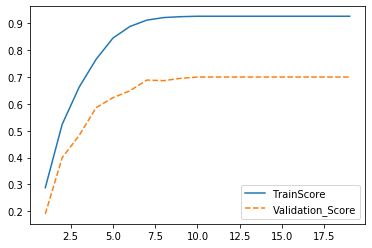

In [11]:
plt.plot(para_depth, train_score, linestyle = "-", label="TrainScore")
plt.plot(para_depth, validation_score, linestyle = "--", label="Validation_Score")
plt.legend()

# 최종 모델 선정

In [ ]:
v_feature_name = df_train_x.columns
tree_final = DecisionTreeRegressor(random_state = 1234,min_samples_leaf = 4, min_samples_split = 8, max_depth = 10) #max_depth=6
tree_final.fit(df_train_x, df_train_y)

# 최종 모델의 정확도 확인
print("Score on training set:{:.3f}".format(tree_final.score(df_train_x,df_train_y)))
print("Score on test set:{:.3f}".format(tree_final.score(df_test_x,df_test_y)))

result = tree_final.predict(df_test_x)
mse = mean_squared_error(result, df_test_y)
mae = mean_absolute_error(result, df_test_y)

print("mse : ",mse.round(3))
print("mae : ",mae.round(3))

export_graphviz(tree_final, out_file="tree_final.dot", feature_names=v_feature_name, impurity=True, filled=True)
with open("tree_final.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

# 설명변수의 중요도 확인

Text(0, 0.5, 'Variable')

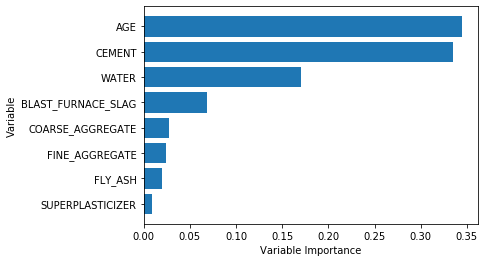

In [13]:
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

df_importance.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("Variable Importance")
plt.ylabel("Variable")

# 랜덤 포레스트 모델

In [16]:
rf_uncustomized = RandomForestRegressor(random_state=1234)
rf_uncustomized.fit(df_train_x,df_train_y)
print("Score on training set:{:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set:{:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

Score on training set:0.982
Score on test set:0.849


In [17]:
rf_uncustomized

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1234, verbose=0, warm_start=False)

# parameter  - 트리 수 조정

In [46]:
train_score = []
validation_score = []
para_n_tree = [n_tree * 10 for n_tree in range(1,20)]

for v_n_estimators in para_n_tree:
    rf = RandomForestRegressor(random_state=1234, n_estimators=v_n_estimators)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    validation_score.append(rf.score(df_validation_x,df_validation_y))
    
df_score_n = pd.DataFrame()
df_score_n["n_estimators"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["Validation_Score"] = validation_score

df_score_n.round(3)


,n_estimators,TrainScore,Validation_Score
0,10,0.975,0.793
1,20,0.979,0.809
2,30,0.981,0.809
3,40,0.982,0.815
4,50,0.982,0.813
5,60,0.982,0.816
6,70,0.982,0.817
7,80,0.982,0.815
8,90,0.982,0.819
9,100,0.982,0.820


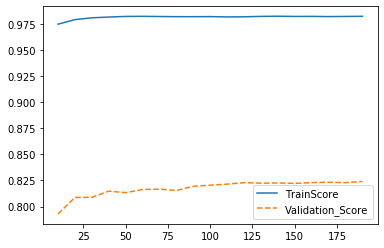

In [49]:
plt.plot(para_n_tree, train_score, linestyle = "-", label="TrainScore")
plt.plot(para_n_tree, validation_score, linestyle = "--", label="Validation_Score")
plt.legend()

100~130사이의 값이 제일 괜찮은 것 같아 더 자세히 살펴보겠습니다.

In [92]:
train_score = []
validation_score = []
para_n_tree = [n_tree * 1 for n_tree in range(100,130)]

for v_n_estimators in para_n_tree:
    rf = RandomForestRegressor(random_state=1234, n_estimators=v_n_estimators)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    validation_score.append(rf.score(df_validation_x,df_validation_y))
    
df_score_n = pd.DataFrame()
df_score_n["n_estimators"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["Validation_Score"] = validation_score

df_score_n.round(3)

,n_estimators,TrainScore,Validation_Score
0,100,0.982,0.820
1,101,0.982,0.821
2,102,0.982,0.821
3,103,0.982,0.821
4,104,0.982,0.821
5,105,0.982,0.821
6,106,0.982,0.821
7,107,0.982,0.822
8,108,0.982,0.822
9,109,0.982,0.821


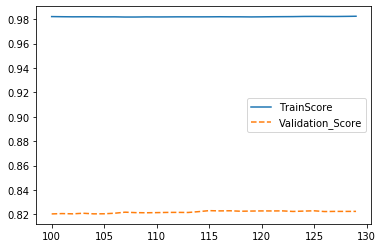

In [93]:
plt.plot(para_n_tree, train_score, linestyle = "-", label="TrainScore")
plt.plot(para_n_tree, validation_score, linestyle = "--", label="Validation_Score")
plt.legend()

거의 비슷한 결과이지만 그 중에서 115를 선택했습니다

# parameter  - 리프의 최소 자료수 조정

In [94]:
train_score = []
validation_score = []
para_leaf = [n_leaf * 1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestRegressor(random_state=1234, n_estimators=115,min_samples_leaf=v_min_samples_leaf)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    validation_score.append(rf.score(df_validation_x,df_validation_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamlesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["Validation_Score"] = validation_score


df_score_leaf.round(3)

,MinSamlesLeaf,TrainScore,Validation_Score
0,1,0.982,0.823
1,2,0.969,0.811
2,3,0.952,0.805
3,4,0.935,0.792
4,5,0.921,0.779
5,6,0.908,0.770
6,7,0.895,0.757
7,8,0.882,0.750
8,9,0.870,0.742
9,10,0.861,0.734


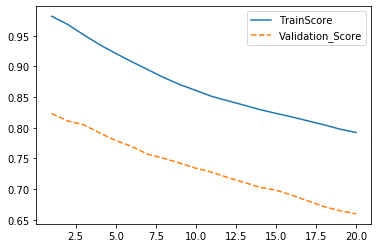

In [95]:
plt.plot(para_leaf, train_score, linestyle = "-", label="TrainScore")
plt.plot(para_leaf, validation_score, linestyle = "--", label="Validation_Score")
plt.legend()

Train score가 0.9를 넘고 Validation Score도 0.8이 넘는 3을 선택했습니다.

# parameter  - 분리 노드의 최소 자료수 조정

In [96]:
train_score = []
validation_score = []
para_split = [n_split * 1 for n_split in range(3,21)]

for v_min_samples_split in para_split:
    rf = RandomForestRegressor(random_state=1234, n_estimators=115,min_samples_leaf=3,min_samples_split=v_min_samples_split)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    validation_score.append(rf.score(df_validation_x,df_validation_y))
    
df_score_split = pd.DataFrame()
df_score_split["MinSamlesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["Validation_Score"] = validation_score
df_score_split.round(3)



,MinSamlesSplit,TrainScore,Validation_Score
0,3,0.952,0.805
1,4,0.952,0.805
2,5,0.952,0.805
3,6,0.952,0.805
4,7,0.948,0.802
5,8,0.944,0.799
6,9,0.939,0.796
7,10,0.934,0.792
8,11,0.929,0.789
9,12,0.925,0.786


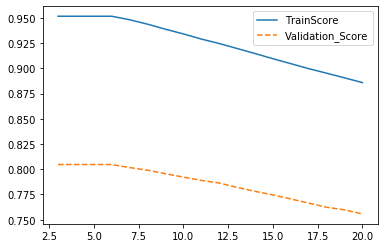

In [97]:
plt.plot(para_split, train_score, linestyle = "-", label="TrainScore")
plt.plot(para_split, validation_score, linestyle = "--", label="Validation_Score")
plt.legend()

표와 그래프를 보고 10을 선택했습니다.

# parameter - 최대 깊이 조정

In [98]:
train_score = []
validation_score = []
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    rf = RandomForestRegressor(random_state=1234, n_estimators=115,min_samples_leaf=3,
                                 min_samples_split=10,max_depth=v_max_depth)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    validation_score.append(rf.score(df_validation_x,df_validation_y))
    
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["Validation_Score"] = validation_score
df_score_depth.round(3)



,Depth,TrainScore,Validation_Score
0,1,0.433,0.324
1,2,0.650,0.518
2,3,0.758,0.624
3,4,0.839,0.709
4,5,0.887,0.753
5,6,0.913,0.775
6,7,0.926,0.785
7,8,0.931,0.790
8,9,0.933,0.792
9,10,0.934,0.792


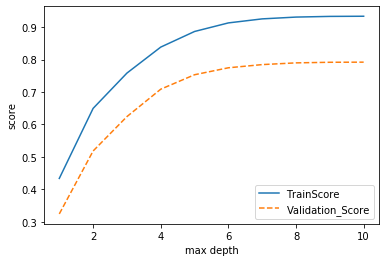

In [99]:
plt.plot(para_depth, train_score, linestyle = "-", label="TrainScore")
plt.plot(para_depth, validation_score, linestyle = "--", label="Validation_Score")
plt.ylabel("score")
plt.xlabel("max depth")
plt.legend()

깊이는 9를 선택했습니다

# 최종 모델 선정

In [117]:
rf_final = RandomForestRegressor(random_state=1234, n_estimators=115,min_samples_leaf=3,
                                 min_samples_split=10,max_depth=9)
rf_final.fit(df_train_x, df_train_y)

print("Score on training set:{:.3f}".format(rf_final.score(df_train_x,df_train_y)))
print("Score on test set:{:.3f}".format(rf_final.score(df_test_x,df_test_y)))


result = rf_final.predict(df_test_x)
mse = mean_squared_error(result, df_test_y)
mae = mean_absolute_error(result, df_test_y)

print("mse : ",mse.round(3))
print("mae : ",mae.round(3))

rf_final



Score on training set:0.933
Score on test set:0.833
mse :  43.504
mae :  5.227


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=9, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=115, n_jobs=None, oob_score=False,
                      random_state=1234, verbose=0, warm_start=False)

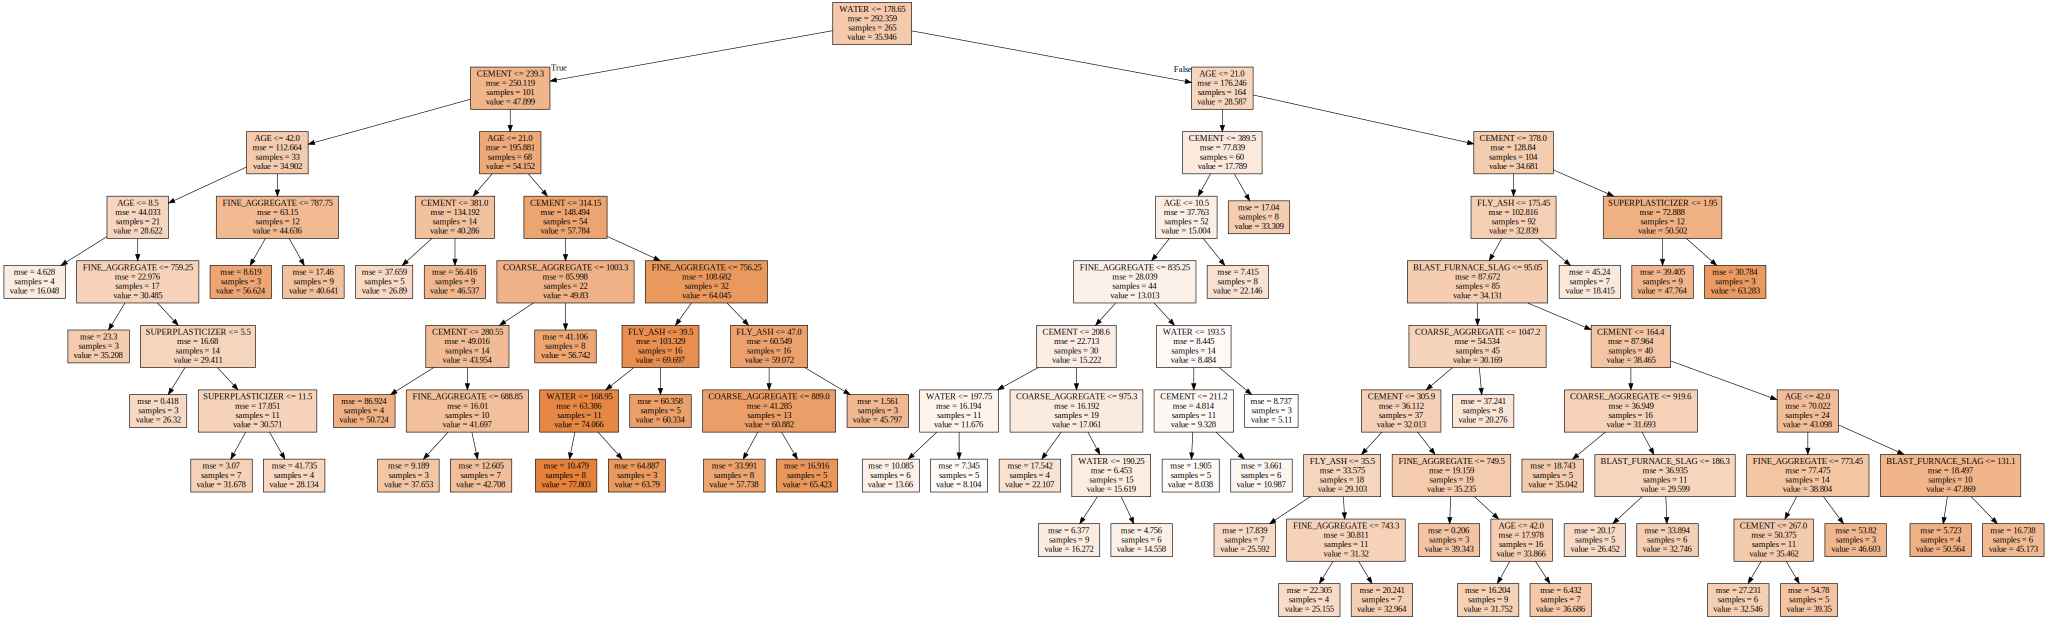

In [118]:
export_graphviz(rf_final.estimators_[0], out_file="rfr_final_0.dot", feature_names=v_feature_name, impurity=True, filled=True)
with open("rfr_final_0.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

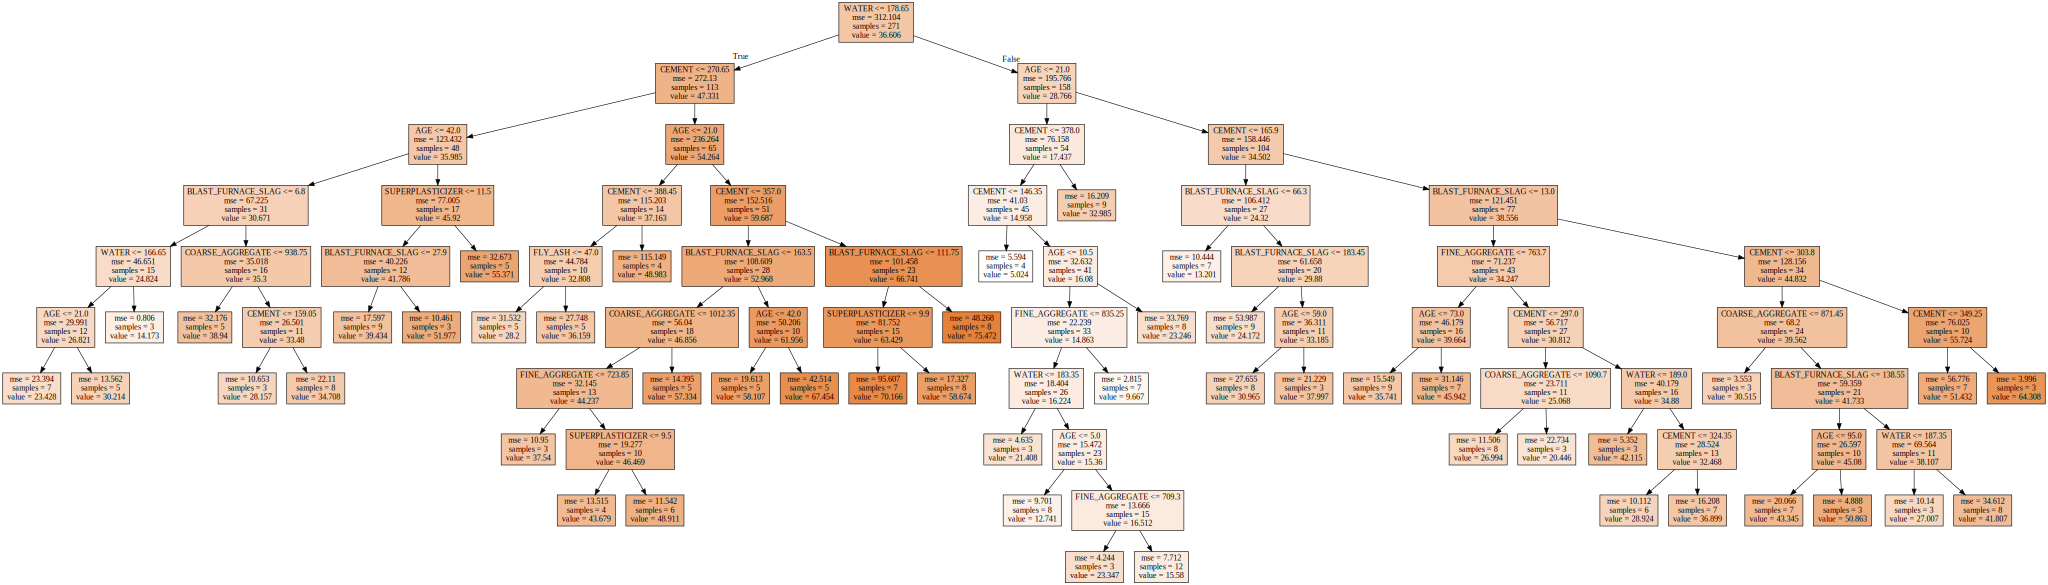

In [119]:
export_graphviz(rf_final.estimators_[10], out_file="rfr_final_0.dot", feature_names=v_feature_name, impurity=True, filled=True)
with open("rfr_final_0.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

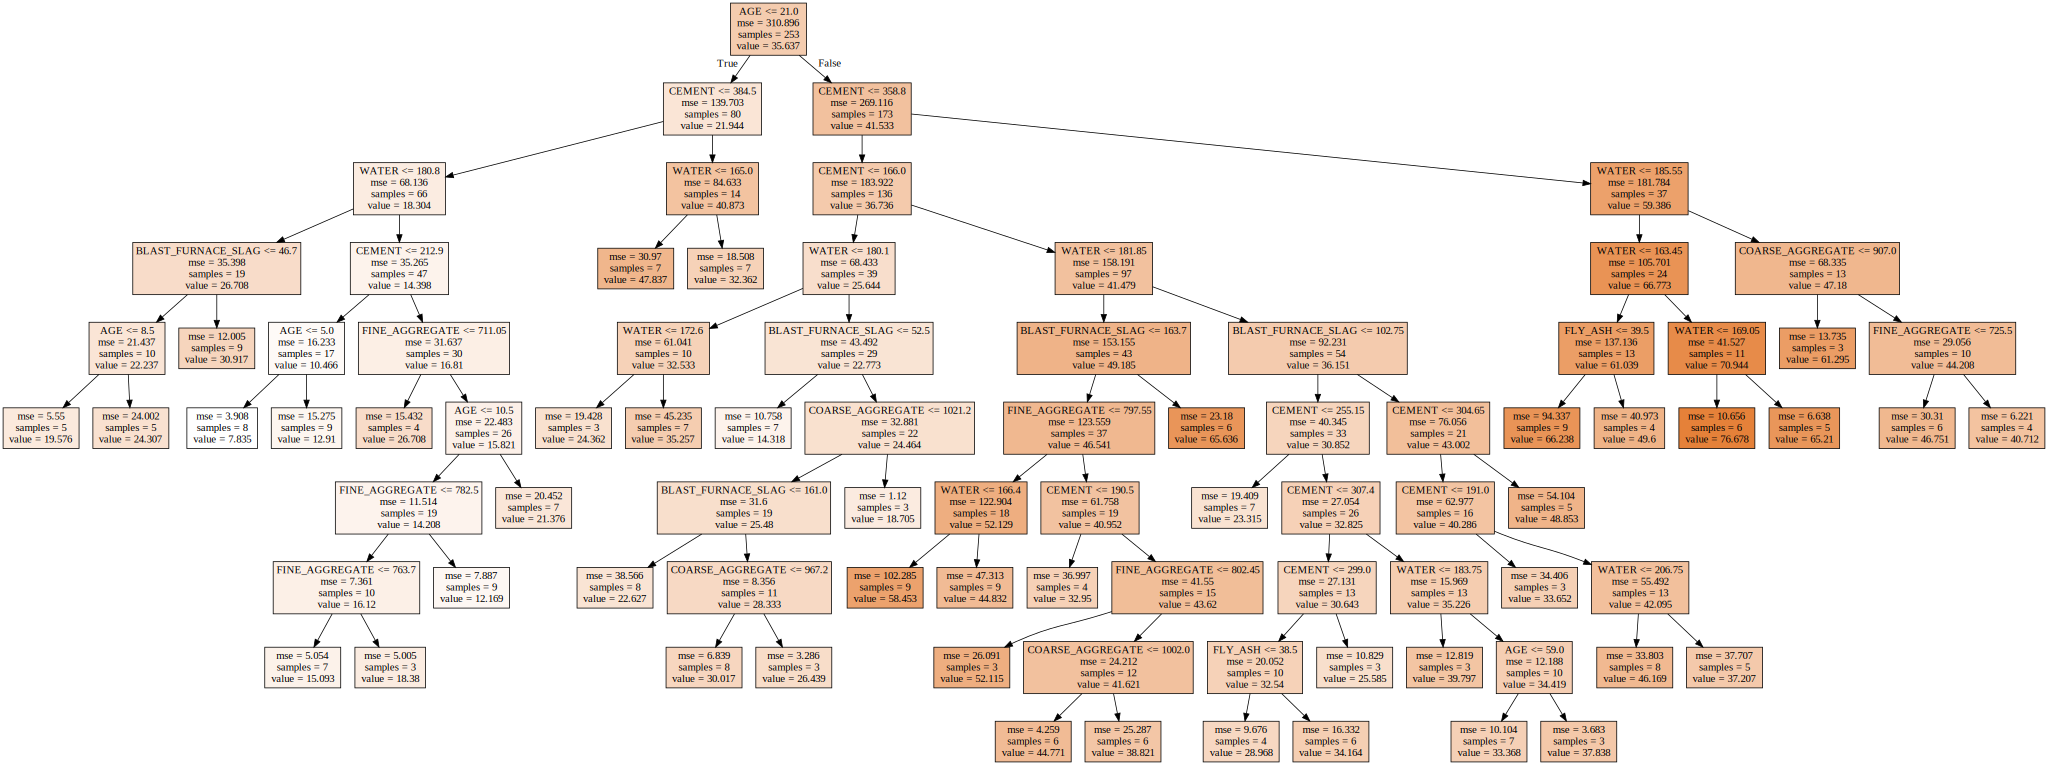

In [120]:
export_graphviz(rf_final.estimators_[20], out_file="rfr_final_0.dot", feature_names=v_feature_name, impurity=True, filled=True)
with open("rfr_final_0.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

# 설명변수의 중요도 확인

Text(0, 0.5, '변수')

/home/pirl/anaconda3/envs/NLP_env/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/envs/NLP_env/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/envs/NLP_env/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/envs/NLP_env/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/envs/NLP_env/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/envs/NLP_

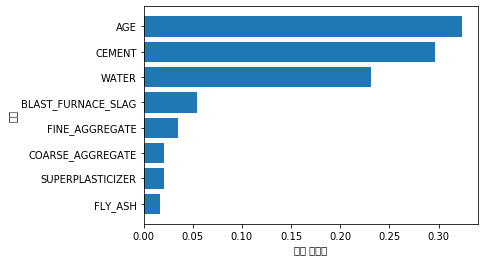

In [106]:
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rf_final.feature_importances_

df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

df_importance.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

의사결정나무 모델의 정확도는 다음과 같습니다  

Score on training set:0.948  

Score on test set:0.761  

mse :  62.177  

mae :  5.887  


랜덤 포레스트 모델의 정확도는 다음과 같습니다  

Score on training set:0.933  

Score on test set:0.833  

mse :  43.504  

mae :  5.227  


의사결정 나무와 랜덤 포레스트 모델 모두 설명변수의 중요도가 AGE가 가장크고 그 다음이 CEMENT와 WATER 입니다.  

두 모델을 비교한 결과 랜덤 포레스트 모델의 정확도가 83.3%로 의사결정나무 모델보다 더 큰 정확도를 보입니다. mse와 mae의 값도 랜덤 포레스트가 더 작아서 랜덤 포레스트 모델이 더 적합한 모델이라고 할 수 있습니다.